Primeramente vamos a reducir el tamaño de la red original y vamos a ir aumentándolo hasta que vea mos que disminuyen las devoluciones con respectoa la pérdida de validación. 

In [1]:

# Todos los import necesarios

from keras import models
from keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Codigo inicial para mejorar más adelante (sacado del Chapter_3_5_Clasif_multicase)
# Cargar el conjunto de datos de Reuters

from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# Codificación de  los datos 

import numpy as np


def vectorize_sequeces(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Vectorización de las muestras
x_Train = vectorize_sequeces(train_data)
x_test = vectorize_sequeces(test_data)

# Codigficación de las etiquetas (vamos a utilizar directamente la manera integrada de keras)

from keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)



In [3]:
# Modelo original:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

# Compilar el modelo
model.compile(optimizer = 'rmsprop', 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

# Separar un conjunto de validación
x_val = x_Train[:1000]
partial_x_train = x_Train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


# Entrenamiento del modelo
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size=512,
                    validation_data=(x_val, y_val))



Epoch 1/20


16/16 [==============================] - 2s 40ms/step - loss: 2.7569 - acc: 0.4878 - val_loss: 1.8687 - val_acc: 0.6090
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 1.5613 - acc: 0.6684 - val_loss: 1.3869 - val_acc: 0.6930
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 1.1797 - acc: 0.7466 - val_loss: 1.2018 - val_acc: 0.7330
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.9619 - acc: 0.7960 - val_loss: 1.0813 - val_acc: 0.7620
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.7940 - acc: 0.8319 - val_loss: 1.0265 - val_acc: 0.7820
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6605 - acc: 0.8616 - val_loss: 0.9674 - val_acc: 0.7960
Epoch 7/20
16/16 [==============================] - 0s 21ms/step - loss: 0.5529 - acc: 0.8826 - val_loss: 0.9309 - val_acc: 0.8090
Epoch 8/20
16/16 [==============================] - 0s 17ms/step - loss: 0.4638

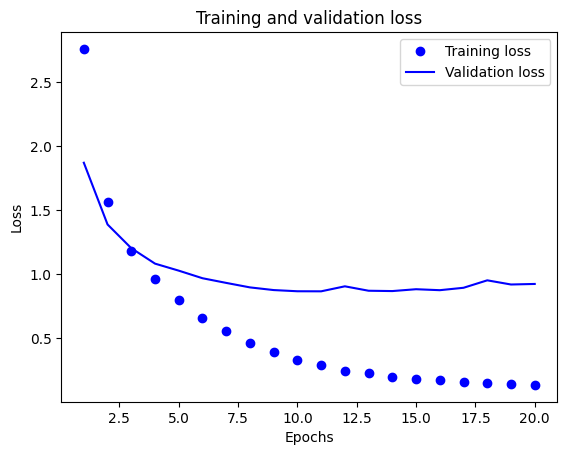

In [4]:
# Trazar la pérdida del entrenamiento y de validación
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

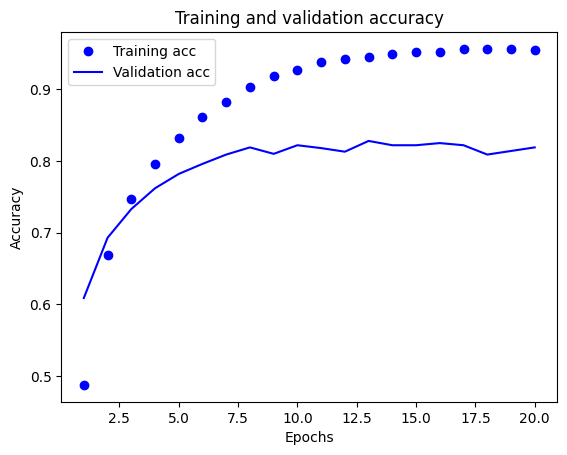

In [5]:
# Trazar la exactitud del entrenamiento y de validación

plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [6]:
# Versión del modelo con menos capacidad
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(4, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))


# Compilar el modelo
model.compile(optimizer = 'rmsprop', 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

# Separar un conjunto de validación
x_val = x_Train[:1000]
partial_x_train = x_Train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]
print(one_hot_test_labels.shape)
print(x_Train.shape)

# Entrenamiento del modelo
history2 = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

(2246, 46)
(8982, 10000)
Epoch 1/20
16/16 [==============================] - 1s 38ms/step - loss: 3.7464 - acc: 0.1211 - val_loss: 3.6729 - val_acc: 0.2540
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 3.6115 - acc: 0.3375 - val_loss: 3.5480 - val_acc: 0.3540
Epoch 3/20
16/16 [==============================] - 0s 13ms/step - loss: 3.4784 - acc: 0.3514 - val_loss: 3.4147 - val_acc: 0.3540
Epoch 4/20
16/16 [==============================] - 0s 20ms/step - loss: 3.3364 - acc: 0.3514 - val_loss: 3.2731 - val_acc: 0.3540
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 3.1894 - acc: 0.3514 - val_loss: 3.1284 - val_acc: 0.3540
Epoch 6/20
16/16 [==============================] - 0s 21ms/step - loss: 3.0422 - acc: 0.3519 - val_loss: 2.9836 - val_acc: 0.3550
Epoch 7/20
16/16 [==============================] - 0s 18ms/step - loss: 2.8990 - acc: 0.3552 - val_loss: 2.8449 - val_acc: 0.3600
Epoch 8/20
16/16 [==============================] - 0s 19m

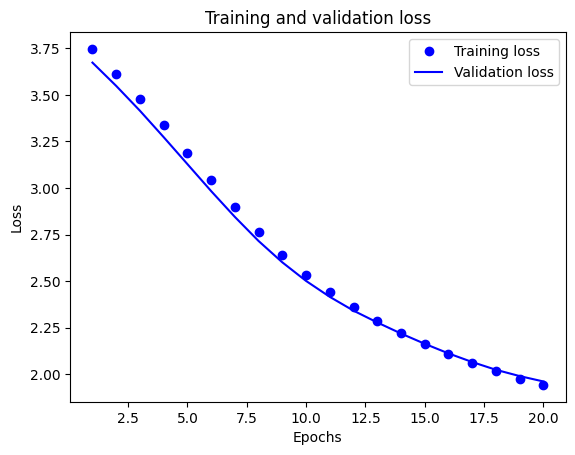

In [7]:
# Trazar la pérdida del entrenamiento y de validación
loss_values = history2.history['loss']
val_loss_values = history2.history['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

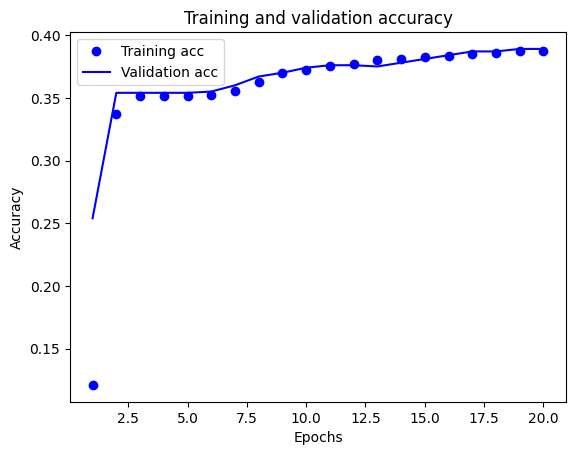

In [8]:
# Trazar la exactitud del entrenamiento y de validación

plt.clf()

acc = history2.history['acc']
val_acc = history2.history['val_acc']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [9]:
# Versión del modelo con más capacidad
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))


# Compilar el modelo
model.compile(optimizer = 'rmsprop', 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

# Separar un conjunto de validación
x_val = x_Train[:1000]
partial_x_train = x_Train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]
print(one_hot_test_labels.shape)
print(x_Train.shape)

# Entrenamiento del modelo
history2 = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

(2246, 46)
(8982, 10000)
Epoch 1/20
16/16 [==============================] - 2s 107ms/step - loss: 2.0281 - acc: 0.5418 - val_loss: 1.2855 - val_acc: 0.6980
Epoch 2/20
16/16 [==============================] - 1s 83ms/step - loss: 1.1128 - acc: 0.7438 - val_loss: 1.0740 - val_acc: 0.7470
Epoch 3/20
16/16 [==============================] - 1s 82ms/step - loss: 0.8017 - acc: 0.8130 - val_loss: 0.9020 - val_acc: 0.8020
Epoch 4/20
16/16 [==============================] - 1s 88ms/step - loss: 0.5819 - acc: 0.8654 - val_loss: 0.8740 - val_acc: 0.8100
Epoch 5/20
16/16 [==============================] - 1s 81ms/step - loss: 0.4253 - acc: 0.9013 - val_loss: 0.8340 - val_acc: 0.8110
Epoch 6/20
16/16 [==============================] - 2s 103ms/step - loss: 0.3175 - acc: 0.9261 - val_loss: 0.8827 - val_acc: 0.8000
Epoch 7/20
16/16 [==============================] - 2s 99ms/step - loss: 0.2253 - acc: 0.9441 - val_loss: 0.8414 - val_acc: 0.8130
Epoch 8/20
16/16 [==============================] - 2s 9

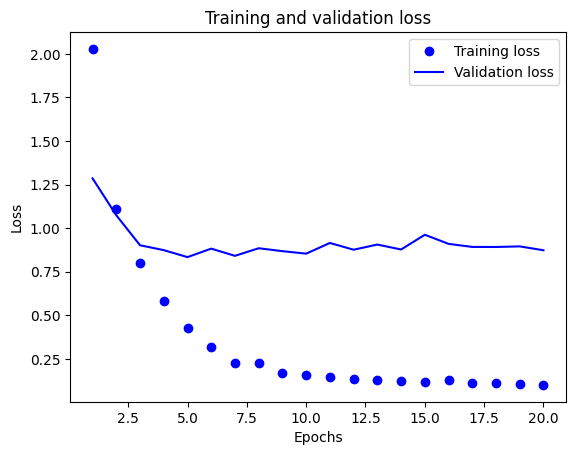

In [10]:
# Trazar la pérdida del entrenamiento y de validación
loss_values = history2.history['loss']
val_loss_values = history2.history['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

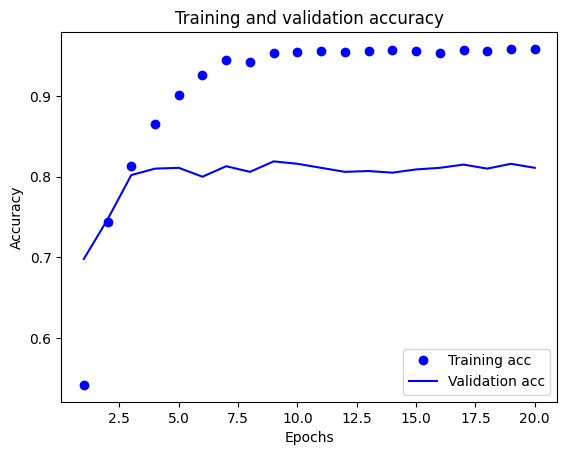

In [11]:
# Trazar la exactitud del entrenamiento y de validación

plt.clf()

acc = history2.history['acc']
val_acc = history2.history['val_acc']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

AÑADIR REGULARIZACIÓN DE PESO

In [12]:
# Clasificar críticas de películas como positivas y negativas

# Carga del conjunto de datos

from keras.datasets import imdb
(train_data, train_labels) , (test_data, test_labels) = imdb.load_data(num_words=10000) #El num de words indica que solo mantendrá las 10000 palabras que más aparecen en los datos de entrenamiento. Se descartarán palabras raras


# Preparación de los datos
# En una red neuronal es necesario introducir tensores, no listas de enteros. Para ello hay dos opciones:
# 1 Rellenar las listas para que tengan la misma longitud y utilizar como primera capa una capa que pueda manejar estos tensores de enteros
# 2 Utilizar codificación one-hot en las listas para convertirlas en vectores de ceros y unos y utilizar como priemra capa de una red una capa dense para manejar datos vectoriales de punto flotante

# Vamos a utilizar la segunda opción

import numpy as np

def vectorize_sequeces(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Vectorización de las muestras
x_Train = vectorize_sequeces(train_data)
x_test = vectorize_sequeces(test_data)

# Vectorizacion de las etiquetas
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asanyarray(test_labels).astype('float32')

In [13]:
# Definición del modelo con regularización simultánea de pesos L1 y L2

from keras import models
from keras import layers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001), activation='relu', input_shape = (10000, )))
model.add(layers.Dense(16, kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Epoch 1/25
30/30 [==============================] - 4s 104ms/step - loss: 1.1779 - acc: 0.7166 - val_loss: 0.7661 - val_acc: 0.7818
Epoch 2/25
30/30 [==============================] - 0s 15ms/step - loss: 0.7159 - acc: 0.8274 - val_loss: 0.6979 - val_acc: 0.8310
Epoch 3/25
30/30 [==============================] - 0s 14ms/step - loss: 0.6609 - acc: 0.8366 - val_loss: 0.6515 - val_acc: 0.8422
Epoch 4/25
30/30 [==============================] - 0s 15ms/step - loss: 0.6303 - acc: 0.8445 - val_loss: 0.6438 - val_acc: 0.8326
Epoch 5/25
30/30 [==============================] - 0s 15ms/step - loss: 0.6088 - acc: 0.8497 - val_loss: 0.6077 - val_acc: 0.8528
Epoch 6/25
30/30 [==============================] - 1s 18ms/step - loss: 0.5930 - acc: 0.8539 - val_loss: 0.5987 - val_acc: 0.8551
Epoch 7/25
30/30 [==============================] - 1s 22ms/step - loss: 0.5888 - acc: 0.8525 - val_loss: 0.5939 - val_acc: 0.8536
Epoch 8/25
30/30 [==============================] - 1s 18ms/step - loss: 0.5775 - 

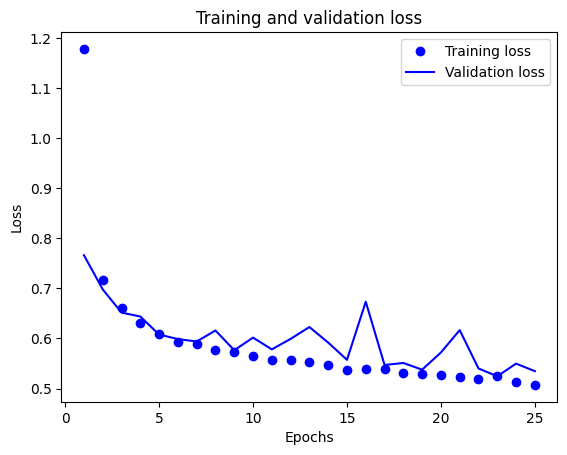

In [14]:
# Compilación del modelo
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])     


# Apartar un conjunto de validación

x_val = x_Train[:10000]
partial_x_train = x_Train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


# Entrenar el modelo
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

hisotry = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 25,
                    batch_size=512,
                    validation_data=(x_val, y_val))


hisotry_dict = hisotry.history
hisotry_dict.keys()

# Trazar la pérdida de entrenamiento y de validación

import matplotlib.pyplot as plt

loss_values = hisotry_dict['loss']
val_loss_values = hisotry_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

AÑADIR UN DROPOUT

In [15]:
# Definición del modelo con dropout
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000, )))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

Epoch 1/25
30/30 [==============================] - 3s 55ms/step - loss: 0.6463 - acc: 0.6223 - val_loss: 0.5839 - val_acc: 0.8153
Epoch 2/25
30/30 [==============================] - 1s 21ms/step - loss: 0.5491 - acc: 0.7763 - val_loss: 0.4962 - val_acc: 0.8664
Epoch 3/25
30/30 [==============================] - 0s 16ms/step - loss: 0.4825 - acc: 0.8337 - val_loss: 0.4377 - val_acc: 0.8797
Epoch 4/25
30/30 [==============================] - 1s 17ms/step - loss: 0.4290 - acc: 0.8615 - val_loss: 0.3911 - val_acc: 0.8696
Epoch 5/25
30/30 [==============================] - 1s 19ms/step - loss: 0.3758 - acc: 0.8806 - val_loss: 0.3463 - val_acc: 0.8862
Epoch 6/25
30/30 [==============================] - 1s 18ms/step - loss: 0.3310 - acc: 0.8950 - val_loss: 0.3283 - val_acc: 0.8840
Epoch 7/25
30/30 [==============================] - 1s 19ms/step - loss: 0.2938 - acc: 0.9068 - val_loss: 0.2947 - val_acc: 0.8908
Epoch 8/25
30/30 [==============================] - 1s 18ms/step - loss: 0.2626 - a

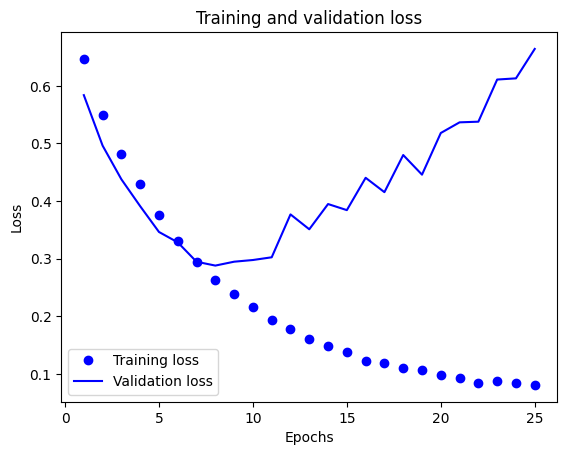

In [16]:
# Compilación del modelo
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])     


# Apartar un conjunto de validación

x_val = x_Train[:10000]
partial_x_train = x_Train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


# Entrenar el modelo
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

hisotry = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 25,
                    batch_size=512,
                    validation_data=(x_val, y_val))


hisotry_dict = hisotry.history
hisotry_dict.keys()

# Trazar la pérdida de entrenamiento y de validación

import matplotlib.pyplot as plt

loss_values = hisotry_dict['loss']
val_loss_values = hisotry_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [18]:
model.save('')

FailedPreconditionError: variables is not a directory